<a href="https://colab.research.google.com/github/tomersk/learn-python/blob/main/05_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 5.9 Interpolation
There are various way of doing interpolation. Commonly used methods are piecewise linear and non-linear, splines, and radial basis functions. In this section, we will use piecewise linear and radial basis function to interpolate the data.
We will first generate few data points having exponential relationship. Then we will interpolate using *interp1d* function of scipy.interpolate library. This function returns an object, which can be used later to evaluate the fitted piecewise linear curve at required data points. Below figure 
shows the fitted piecewise polynomial along with the data used to generate it.

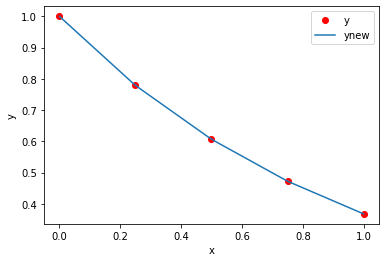

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d

# generate data
x = np.linspace(0,1,5)
y = np.exp(-x)
f = interp1d(x, y)
xnew = np.linspace(x.min(), x.max())
ynew = f(xnew) # use interpolation function returned by `interp1d`

# plot
plt.plot(x, y, 'ro', label='y')
plt.plot(xnew, ynew, '-', label='ynew')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

By detault, the inerp1d does not do extrapolation i.e. it will issue an error if we want to fit the data outside input data range. We can suppress the error by specifying the bounds_error=None argument. In
this case, it will give nan, if we want to interpolate outside input data range. 

We can interpolate outside data range, by using the argument *fill_value=“extrapolate”*. Another alternative, to interpolate outside the input data range, we can use Rbf function of the *scipy.interpolate library*. Remember in section 4.4, the interpolated data was only in the range of location of input data. We will use Rbf function to interpolate outside these range. We are using plt.imshow to make the 2D plot. Below figure shows the plot. It is clear from the figure, that it is able to interpolate outside input data range
also.

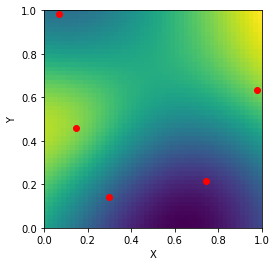

In [5]:
import scipy as sp
x = np.random.rand(5)
y = np.random.rand(5)
pet = 2+2*np.random.rand(5)

rbfi = sp.interpolate.Rbf(x, y, pet) # radial basis function interpolation instance

xi = np.linspace(0,1)
yi = np.linspace(0,1)
XI, YI = np.meshgrid(xi,yi) # gridded locations

di = rbfi(XI, YI) # interpolated values

plt.imshow(di, extent=(0,1,0,1), origin='lower')
plt.scatter(x,y, color='r')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis((0,1,0,1))
plt.show()